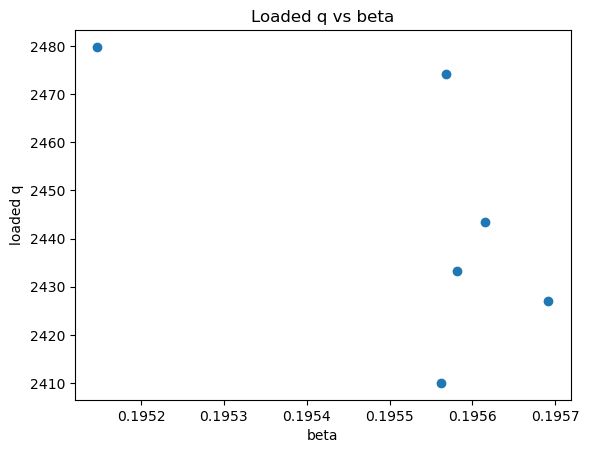

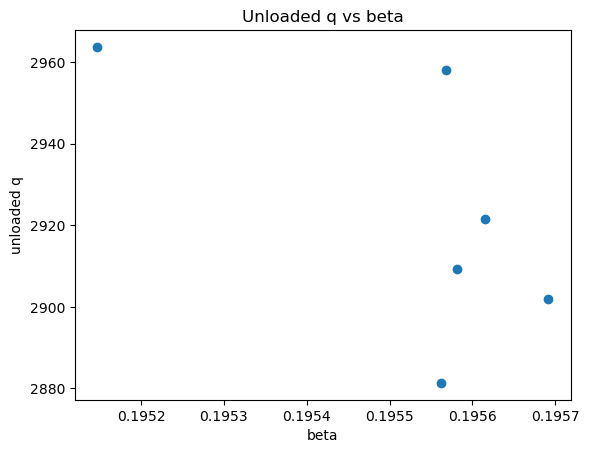

In [2]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

# define the connection to the postgres database
conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='axionsrock', port=5432)
cur = conn.cursor()

# extract data and convert to arrays
cur.execute("SELECT id FROM na_scans ORDER BY id ASC;")
id_tuple = np.asarray(cur.fetchall())
id = np.zeros(len(id_tuple))
for k in range (0, len(id)):
    id[k] = id_tuple[k, 0]
cur.execute("SELECT QL_trans FROM na_scans ORDER BY id ASC;")
ql_tuple = np.asarray(cur.fetchall())
ql = np.zeros(len(ql_tuple))
for k in range (0, len(ql)):
    ql[k] = ql_tuple[k, 0]
cur.execute("SELECT beta FROM na_scans ORDER BY id ASC;")
beta_tuple = np.asarray(cur.fetchall())
beta = np.zeros(len(beta_tuple))
for k in range (0, len(beta)):
    beta[k] = beta_tuple[k, 0]
cur.execute("SELECT f0_trans FROM na_scans ORDER BY id ASC;")
f0_tuple = np.asarray(cur.fetchall())
f0 = np.zeros(len(f0_tuple))
for k in range (0, len(f0)):
    f0[k] = f0_tuple[k, 0]

# plot loaded q vs beta
plt.scatter(beta, ql)
plt.xlabel('beta')
plt.ylabel('loaded q')
plt.title("Loaded q vs beta")
plt.show()

one_plus_beta = np.zeros(len(beta))
for k in range (0, len(beta)):
    one_plus_beta[k] = beta_tuple[k] + 1

q0 = np.multiply(ql, one_plus_beta)

plt.scatter(beta, q0)
plt.xlabel('beta')
plt.ylabel('unloaded q')
plt.title("Unloaded q vs beta")
plt.show()